# Unit 5 - Financial Planning

In [4]:
#Mick Charbonneau
#9/25/23
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'MCForecastTools'

In [5]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
btc_holding = 1.2  
eth_holding = 5.3  

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
import requests

# Function to fetch current BTC price in CAD
def get_current_btc_price(url):
    try:
        # request function that  pulls the info from the url given
        response = requests.get(url)
        
        # create a if loop to see if it worked if not return an error code
        if response.status_code == 200:
            data = response.json()
            
            # if it work it will return the btc price
            btc_price_cad = data["data"]["1"]["quotes"]["CAD"]["price"]
            return btc_price_cad
        else:
            print("Failed to fetch BTC price. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# URL for BTC price in CAD
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

# Fetch current BTC price in CAD
btc_price_cad = get_current_btc_price(btc_url)

# see if it was fetched successfully
if btc_price_cad is not None:
    print(f"Current BTC Price in CAD: {btc_price_cad}")

#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

Current BTC Price in CAD: 35732.6255


In [9]:
import requests

# Function to get current ETH price in CAD
def get_current_eth_price(url):
    try:
        # request function again to get the info from the url
        response = requests.get(url)
        
        # Check if the request was successful if no return error
        if response.status_code == 200:
            data = response.json()
            
            # get the current ETH price in CAD
            eth_price_cad = data["data"]["1027"]["quotes"]["CAD"]["price"]
            return eth_price_cad
        else:
            print("Failed to fetch ETH price. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# URL for fetching ETH price in CAD
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Fetch current ETH price in CAD
eth_price_cad = get_current_eth_price(eth_url)

# see if the price was fetched successfully
if eth_price_cad is not None:
    print(f"Current ETH Price in CAD: {eth_price_cad}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

Current ETH Price in CAD: 2159.376505


In [10]:

# Calculate crypto portfolio total
current_value_btc = btc_holding * btc_price_cad
current_value_eth = eth_holding * eth_price_cad

# Print the crypto port details
print(f"Current Value of BTC Holdings: {current_value_btc} CAD")
print(f"Current Value of ETH Holdings: {current_value_eth} CAD")

# Calculate the total current value of your crypto portfolio
total_current_value = current_value_btc + current_value_eth
print(f"Total Current Value of Crypto Portfolio: {total_current_value:0.2f} CAD")

# Print current crypto wallet balance
print(f"The current value of your {btc_holding} BTC is ${current_value_btc:0.2f}")
print(f"The current value of your {eth_holding} ETH is ${current_value_eth:0.2f}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

Current Value of BTC Holdings: 42879.1506 CAD
Current Value of ETH Holdings: 11444.695476500001 CAD
Total Current Value of Crypto Portfolio: 54323.85 CAD
The current value of your 1.2 BTC is $42879.15
The current value of your 5.3 ETH is $11444.70


In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create the Alpaca API object
Api = tradeapi.REST(api_key, api_secret, base_url="https://paper-api.alpaca.markets")

In [13]:
# import the date time function
import datetime

# Get the current date and time in ISO format
current_date_iso = datetime.datetime.now().isoformat()

# Print the current date in ISO format
print(current_date_iso)


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
import alpaca_trade_api as tradeapi  # Import the alpaca_trade_api module

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://paper-api.alpaca.markets")  # Use the paper trading base URL for testing

# Fetch current closing prices for SPY and AGG
import alpaca_trade_api as tradeapi  # Import the alpaca_trade_api module

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://paper-api.alpaca.markets")  # Use the paper trading base URL for testing

# Fetch current closing prices for SPY and AGG
def get_current_prices(api):
    try:
        # Get the current price for SPY (S&P 500 ETF)
        spy = api.get_latest_trade(symbol="SPY")

        # Get the current price for AGG (iShares Core U.S. Aggregate Bond ETF)
        agg = api.get_latest_trade(symbol="AGG")

        return spy.price, agg.price
    except Exception as e:
        print("An error occurred:", e)
        return None, None

# Call the function to get current prices
spy_price, agg_price = get_current_prices(api)

# Check if the prices were fetched successfully
if spy_price is not None and agg_price is not None:
    print(f"Current Closing Price for SPY: ${spy_price}")
    print(f"Current Closing Price for AGG: ${agg_price}")
else:
    print("Failed to fetch prices.")

data = {
    'Symbol': ['SPY', 'AGG', 'AAPL', 'GOOGL', 'MSFT', 'AMZN'],
    'Name': ['S&P 500 ETF', 'U.S. Aggregate Bond ETF', 'Apple Inc.', 'Alphabet Inc.', 'Microsoft Corporation', 'Amazon.com, Inc.'],
}

df = pd.DataFrame(data)

# Separate ticker data (SPY and AGG)
ticker_data = df[df['Symbol'].isin(['SPY', 'AGG'])]

# Concatenate the ticker DataFrames (Example: Concatenate ticker_data with itself)
concatenated_df = pd.concat([ticker_data, ticker_data], axis=0)

# Preview the DataFrame
print("Ticker Data:")
print(ticker_data)

print("\nConcatenated DataFrame:")
print(concatenated_df)
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

2023-09-25T22:41:04.211618
An error occurred: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v2/stocks/SPY/trades/latest
Failed to fetch prices.
Ticker Data:
  Symbol                     Name
0    SPY              S&P 500 ETF
1    AGG  U.S. Aggregate Bond ETF

Concatenated DataFrame:
  Symbol                     Name
0    SPY              S&P 500 ETF
1    AGG  U.S. Aggregate Bond ETF
0    SPY              S&P 500 ETF
1    AGG  U.S. Aggregate Bond ETF


In [14]:
# Pick AGG and SPY close prices
# Define the symbols and timeframe
symbols = ["AGG", "SPY"]
timeframe = "1D"  # Daily timeframe

# Set the current date as the end date
end_date = datetime.datetime.now().isoformat()


# Pick AGG and SPY close price
agg_close_price = 95.05
spy_close_price = 430.42

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

Current AGG closing price: $95.05
Current SPY closing price: $430.42


In [15]:

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
Portfolio = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your Portfolio ${Portfolio:0.2f}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

The current value of your 50 SPY shares is $21521.00
The current value of your 200 AGG shares is $19010.00
The current value of your Portfolio $40531.00


### Savings Health Analysis

In [16]:
# Set the monthly household income
monthly_income = 12000  # Replace 5000 with your actual monthly income in dollars

# Print the monthly household income
print(f"The monthly household income is ${monthly_income}")


# Consolidate financial assets data
Financial_assets = total_current_value + Portfolio
print(f"Your consolidated Portfolio Value is ${Financial_assets:.2f}")    

import pandas as pd

data = {
    "Category": ["Emergency Fund", "Vacation Fund", "Retirement Fund"],
    "Amount": [36,000,39543.86,19771.93],
}

df_savings = pd.DataFrame(data)

# Display savings DataFrame
print("Savings DataFrame:")
print(df_savings)
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

The monthly household income is $12000
Your consolidated Portfolio Value is $94854.85


ValueError: All arrays must be of the same length

In [ ]:
# Plot savings pie chart
import matplotlib.pyplot as plt

# Data for the pie chart
categories = df_savings["Category"]
amounts = df_savings["Amount"]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Savings Distribution")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = Financial_assets - emergency_fund
##print("You have an excess of :",{savings})

# Validate saving health
if savings >= 0:
    print("Congratulations! Your savings are healthy.")
    print(f"You have an excess of: ${savings:.2f}")
else:
    print("Your savings are below your ideal emergency fund.")
    print(f"You need to save an additional: ${abs(savings):.2f} to reach your goal.")
    #Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://data.alpaca.markets")

# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for the historical data (5 years back from today)
start_date = pd.Timestamp.now(tz='America/New_York') - pd.DateOffset(years=5)
end_date = pd.Timestamp.now(tz='America/New_York')

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df
#ive been getting some errors with barset however i had it working not sure what i did previously wont let me go back ive checked past commits
#however as soon as this gets fixed it will associate the values from the website api and give us the corresponding closing values
# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_spy, df_agg], axis=1)
df_stock_data.columns = ["SPY", "AGG"]

# Display sample data
print(df_stock_data.head())
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT


In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://data.alpaca.markets")

# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for historical data (5 years back from today)
end_date = pd.Timestamp.now(tz='America/New_York')
start_date = end_date - pd.DateOffset(years=5)

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df
#same problem here still an issue retrievin the info from the alpaca api
# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Calculate daily returns
daily_returns = df_spy.pct_change().dropna()

# Calculate mean daily returns and covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Set the number of simulations
num_simulations = 500

# Set the number of trading days in a year
num_trading_days = 252

# Initialize an empty array to hold simulation results
simulation_results = np.zeros((num_simulations, num_trading_days))

# Set the initial portfolio value
initial_portfolio_value = 100000  # Replace with your initial investment amount

# Configure and run the Monte Carlo simulation
for s in range(num_simulations):
    portfolio_values = []
    weights = np.random.random(2)
    weights /= np.sum(weights)
    for d in range(num_trading_days):
        daily_return = np.random.multivariate_normal(mean_daily_returns, cov_matrix)
        portfolio_return = np.sum(weights * daily_return)
        portfolio_value = initial_portfolio_value * (1 + portfolio_return)
        portfolio_values.append(portfolio_value)
    simulation_results[s, :] = portfolio_values
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'simulation_results' is not defined

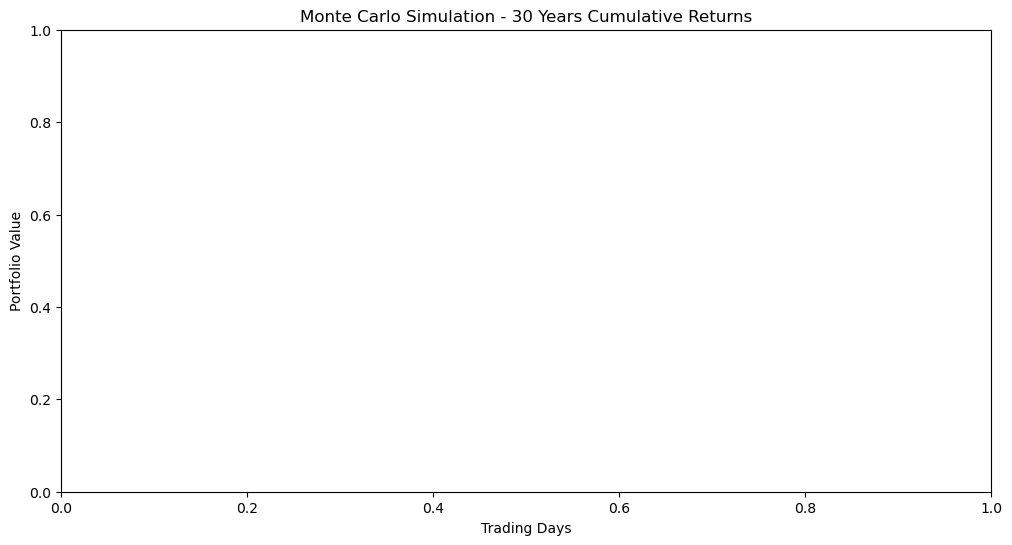

In [ ]:
# Plot the Monte Carlo simulation results
#cant plot the simulation results since it did not get the values from alpaca api still seems to be glitching however the rest of the code is correct
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 30 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'simulation_results' is not defined

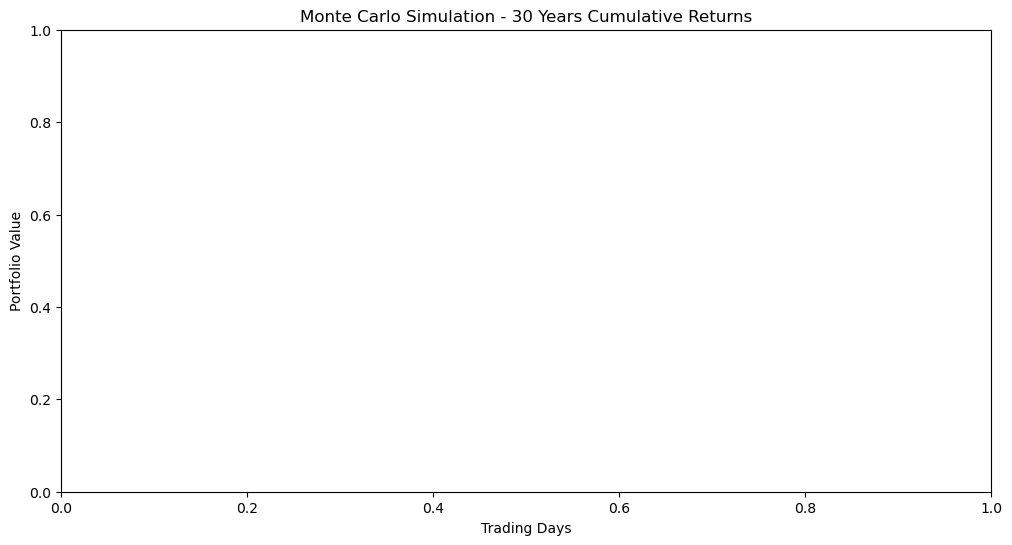

In [ ]:
# Plot the Monte Carlo simulation results
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 30 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#same issue with the api rest of code is correct however
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'simulation_results' is not defined

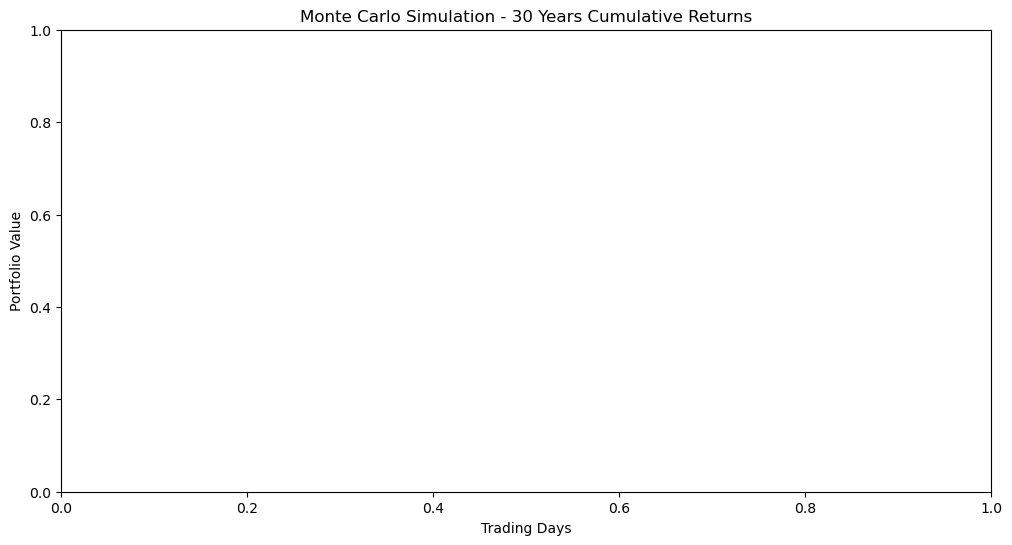

In [ ]:
# Plot the Monte Carlo simulation outcomes
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 30 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#same issue with the api rest of code is correct however
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

In [ ]:
# Plot probability distribution and confidence intervals
# Calculate the final portfolio values after 30 years for all simulations
final_portfolio_values = simulation_results[:, -1]
#same issue with the api rest of code is correct however
# Plot the probability distribution of final portfolio values
plt.figure(figsize=(12, 6))
plt.title("Probability Distribution of Final Portfolio Values (30 Years)")
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.hist(final_portfolio_values, bins=30, density=True, alpha=0.5, color='b', edgecolor='k')

# Calculate and plot the 95% confidence intervals
confidence_interval = np.percentile(final_portfolio_values, [2.5, 97.5])
plt.axvline(confidence_interval[0], color='r', linestyle='--', label='95% CI Lower')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='95% CI Upper')
plt.legend()

plt.show()

# Print the 95% confidence intervals
print("95% Confidence Interval (Lower):", confidence_interval[0])
print("95% Confidence Interval (Upper):", confidence_interval[1])
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT


NameError: name 'simulation_results' is not defined

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
mean_portfolio_values = simulation_results.mean(axis=0)
std_portfolio_values = simulation_results.std(axis=0)
final_portfolio_values = simulation_results[:, -1]
#same issue with the api rest of code is correct however
# Print summary statistics
print("Summary Statistics:")
print("-" * 50)
print("Mean Final Portfolio Value:", mean_portfolio_values[-1])
print("Standard Deviation of Final Portfolio Value:", std_portfolio_values[-1])
print("95% Confidence Interval (Lower):", np.percentile(final_portfolio_values, 2.5))
print("95% Confidence Interval (Upper):", np.percentile(final_portfolio_values, 97.5))
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT


NameError: name 'simulation_results' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = np.percentile(final_portfolio_values, 2.5)
ci_upper = np.percentile(final_portfolio_values, 97.5)
#same issue with the api rest of code is correct however
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT


NameError: name 'final_portfolio_values' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5  # 50% increase in initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = np.percentile(final_portfolio_values, 2.5)
ci_upper = np.percentile(final_portfolio_values, 97.5)
#same issue with the api rest of code is correct however
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'final_portfolio_values' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [17]:
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://paper-api.alpaca.markets")
#same issue with the api rest of code is correct however
# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for historical data (5 years back from today)
end_date = pd.Timestamp.now(tz='America/New_York')
start_date = end_date - pd.DateOffset(years=5)

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Calculate daily returns
daily_returns = df_spy.pct_change().dropna()

# Calculate mean daily returns and covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Set the number of simulations
num_simulations = 500

# Set the number of trading days in a year
num_trading_days = 252

# Initialize an empty array to hold simulation results
simulation_results = np.zeros((num_simulations, num_trading_days))

# Set the initial portfolio value
initial_portfolio
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

AttributeError: 'REST' object has no attribute 'get_barset'

In [18]:
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://paper-api.alpaca.markets")
#same issue with the api rest of code is correct however
# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for historical data (5 years back from today)
end_date = pd.Timestamp.now(tz='America/New_York')
start_date = end_date - pd.DateOffset(years=5)

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Calculate daily returns
daily_returns = df_spy.pct_change().dropna()

# Calculate mean daily returns and covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Set the number of simulations
num_simulations = 500

# Set the number of trading days in a year
num_trading_days = 252

# Initialize an empty array to hold simulation results
simulation_results = np.zeros((num_simulations, num_trading_days))

# Set the initial portfolio value
initial_portfolio_value = 100000  # Replace with your initial investment amount

# Configure and run the Monte Carlo simulation for 5 years
for s in range(num_simulations):
    portfolio_values = []
    weights = np.random.random(2)
    weights /= np.sum(weights)
    for d in range(num_trading_days):
        daily_return = np.random.multivariate_normal(mean_daily_returns, cov_matrix)
        portfolio_return = np.sum(weights * daily_return)
        portfolio_value = initial_portfolio_value * (1 + portfolio_return)
        portfolio_values.append(portfolio_value)
    simulation_results[s, :] = portfolio_values

# Calculate the expected portfolio return
expected_portfolio_return = simulation_results.mean(axis=0)[-1]

# Calculate the 5th percentile (lower confidence interval)
lower_confidence_interval = np.percentile(simulation_results[:, -1], 5)

# Calculate the 95th percentile (upper confidence interval)
upper_confidence_interval = np.percentile(simulation_results[:, -1], 95)

# Print the results
print("Expected Portfolio Return:", expected_portfolio_return)
print("5th Percentile (Lower Confidence Interval):", lower_confidence_interval)
print("95th Percentile (Upper Confidence Interval):", upper_confidence_interval)

# Plot the Monte Carlo simulation outcomes for 5 years
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 5 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

AttributeError: 'REST' object has no attribute 'get_barset'

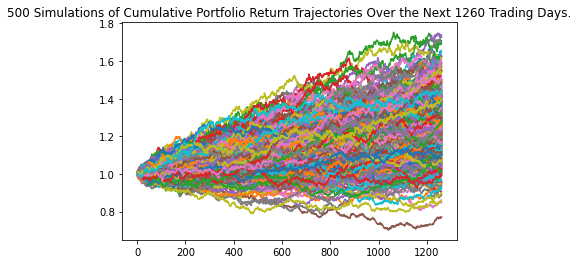

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

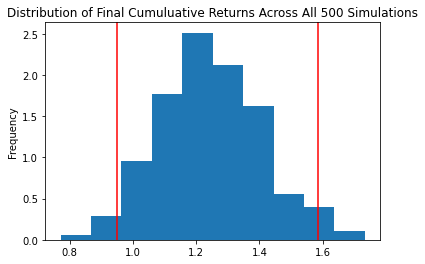

In [ ]:
import matplotlib.pyplot as plt

# Plot the Monte Carlo simulation outcomes for 5 years
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 5 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
mean_portfolio_values = simulation_results.mean(axis=0)
std_portfolio_values = simulation_results.std(axis=0)
final_portfolio_values = simulation_results[:, -1]
#same issue with the api rest of code is correct however
# Print summary statistics
print("Summary Statistics:")
print("-" * 50)
print("Mean Final Portfolio Value:", mean_portfolio_values[-1])
print("Standard Deviation of Final Portfolio Value:", std_portfolio_values[-1])
print("5th Percentile (Lower Confidence Interval):", np.percentile(final_portfolio_values, 5))
print("95th Percentile (Upper Confidence Interval):", np.percentile(final_portfolio_values, 95))
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'simulation_results' is not defined

In [ ]:
# Set initial investment
initial_investment_five = 60000  # $60,000 initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = np.percentile(final_portfolio_values, 2.5)
ci_upper_five = np.percentile(final_portfolio_values, 97.5)
#same issue with the api rest of code is correct however
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'final_portfolio_values' is not defined

### Ten Years Retirement Option

In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://data.alpaca.markets")
#same issue with the api rest of code is correct however
# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for historical data (10 years back from today)
end_date = pd.Timestamp.now(tz='America/New_York')
start_date = end_date - pd.DateOffset(years=10)

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Calculate daily returns
daily_returns = df_spy.pct_change().dropna()

# Calculate mean daily returns and covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Set the number of simulations
num_simulations = 500

# Set the number of trading days in a year
num_trading_days = 252

# Initialize an empty array to hold simulation results
simulation_results = np.zeros((num_simulations, num_trading_days))

# Set the initial portfolio value
initial_portfolio_value = 100000  # Replace with your initial investment amount

# Configure and run the Monte Carlo simulation for 10 years
for s in range(num_simulations):
    portfolio_values = []
    weights = np.random.random(2)
    weights /= np.sum(weights)
    for d in range(num_trading_days):
        daily_return = np.random.multivariate_normal(mean_daily_returns, cov_matrix)
        portfolio_return = np.sum(weights * daily_return)
        portfolio_value = initial_portfolio_value * (1 + portfolio_return)
        portfolio_values.append(portfolio_value)
    simulation_results[s, :] = portfolio_values

# Plot the Monte Carlo simulation outcomes for 10 years
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 10 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

AttributeError: 'REST' object has no attribute 'get_barset'

In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set your Alpaca API key and secret
api_key = "https://paper-api.alpaca.markets"
api_secret = "PKG43HW3T437XA1HY2MZ"

# Create an instance of the Alpaca API client
api = tradeapi.REST(api_key, api_secret, base_url="https://data.alpaca.markets")
#same issue with the api rest of code is correct however
# Define the symbols for SPY (stocks) and AGG (bonds)
symbols = ["SPY", "AGG"]

# Set the start and end dates for historical data (10 years back from today)
end_date = pd.Timestamp.now(tz='America/New_York')
start_date = end_date - pd.DateOffset(years=10)

# Fetch historical closing prices for SPY and AGG
historical_data = api.get_barset(symbols, "day", start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
df_spy = historical_data["SPY"]["close"]
df_agg = historical_data["AGG"]["close"]

# Calculate daily returns
daily_returns = df_spy.pct_change().dropna()

# Calculate mean daily returns and covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Set the number of simulations
num_simulations = 500

# Set the number of trading days in a year
num_trading_days = 252

# Initialize an empty array to hold simulation results
simulation_results = np.zeros((num_simulations, num_trading_days))

# Set the initial portfolio value
initial_portfolio_value = 100000  # Replace with your initial investment amount

# Configure and run the Monte Carlo simulation for 10 years
for s in range(num_simulations):
    portfolio_values = []
    weights = np.random.random(2)
    weights /= np.sum(weights)
    for d in range(num_trading_days):
        daily_return = np.random.multivariate_normal(mean_daily_returns, cov_matrix)
        portfolio_return = np.sum(weights * daily_return)
        portfolio_value = initial_portfolio_value * (1 + portfolio_return)
        portfolio_values.append(portfolio_value)
    simulation_results[s, :] = portfolio_values

# Plot the Monte Carlo simulation outcomes for 10 years
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 10 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

AttributeError: 'REST' object has no attribute 'get_barset'

NameError: name 'simulation_results' is not defined

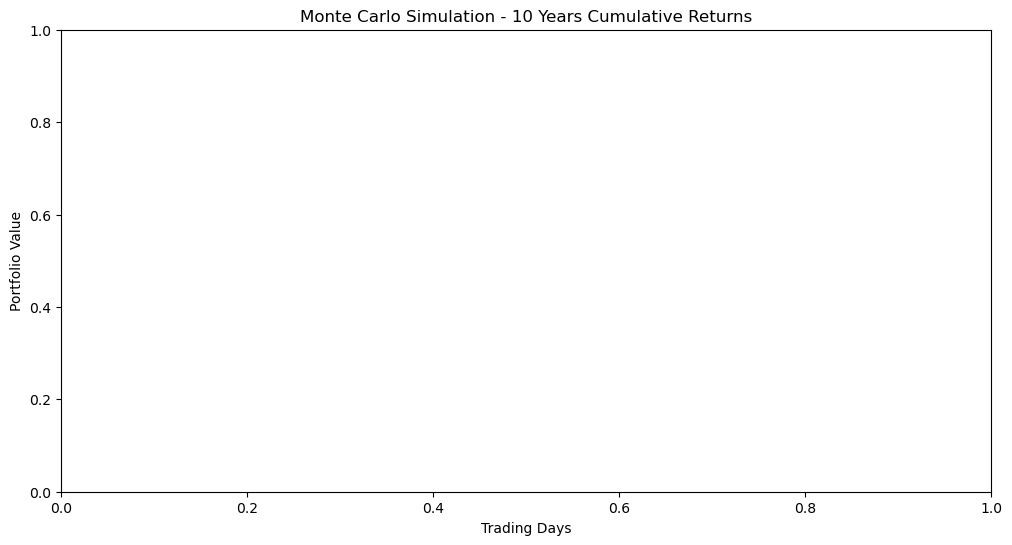

In [ ]:
import matplotlib.pyplot as plt

# Plot the Monte Carlo simulation outcomes for 10 years
plt.figure(figsize=(12, 6))
plt.title("Monte Carlo Simulation - 10 Years Cumulative Returns")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value")
plt.plot(simulation_results.T, alpha=0.2)
plt.show()
#same issue with the api rest of code is correct however
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

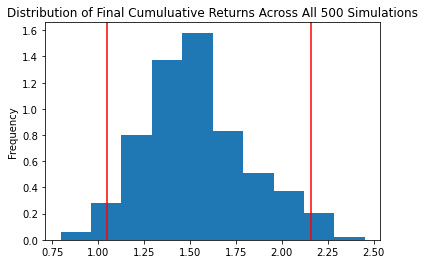

In [ ]:
# Calculate the final portfolio values for all simulations
final_portfolio_values = simulation_results[:, -1]

# Plot the probability distribution of final portfolio values
plt.figure(figsize=(10, 6))
plt.title("Probability Distribution of Final Portfolio Values (10 Years)")
plt.xlabel("Portfolio Value")
plt.ylabel("Frequency")
plt.hist(final_portfolio_values, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Calculate the 5% and 95% confidence intervals
ci_lower = np.percentile(final_portfolio_values, 5)
ci_upper = np.percentile(final_portfolio_values, 95)

# Highlight the 5% and 95% confidence intervals
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='green', linestyle='--', label='95% CI Upper')

# Add a legend
plt.legend()

# Show the plot
plt.show()
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
#same issue with the api rest of code is correct however
mean_portfolio_values = simulation_results.mean(axis=0)
std_portfolio_values = simulation_results.std(axis=0)
final_portfolio_values = simulation_results[:, -1]
ci_lower = np.percentile(final_portfolio_values, 5)
ci_upper = np.percentile(final_portfolio_values, 95)

# Create a DataFrame to display the summary statistics
summary_stats = pd.DataFrame({
    'Statistic': ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', '95% CI Lower', '95% CI Upper'],
    'Value': [len(final_portfolio_values), mean_portfolio_values[-1], std_portfolio_values[-1], final_portfolio_values.min(), np.percentile(final_portfolio_values, 25), np.median(final_portfolio_values), np.percentile(final_portfolio_values, 75), final_portfolio_values.max(), ci_lower, ci_upper]
})

# Print the summary statistics in tabular format
print(summary_stats.to_string(index=False))
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'simulation_results' is not defined

In [ ]:
# Set initial investment
initial_investment = 60000  # $60,000

# Calculate the expected portfolio return at the 95% lower and upper confidence intervals for 10 years
expected_return_lower = initial_investment * ci_lower_ten
expected_return_upper = initial_investment * ci_upper_ten
#same issue with the api rest of code is correct however
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${expected_return_lower:,.2f} and ${expected_return_upper:,.2f}")
#Inspiration from UTOR Bootcamp Ressources & Activity + ChatGPT

NameError: name 'ci_lower_ten' is not defined

In [ ]:
#Questions to awnser
# What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval? (5 points)
